In [1]:
import cv2
import numpy as np

In [2]:
# Load the MNIST image
mnist = cv2.imread('../datasets/digits.png', 0)

mnist.shape

(1000, 2000)

In [3]:
# Split the images by equal 50 x 100
images = [np.hsplit(row, 100) for row in np.vsplit(mnist, 50)]
images = np.array(images, dtype=np.float32)

In [4]:
images.shape

(50, 100, 20, 20)

In [5]:
# Split the images into 50/50 train/test set
train_features = images[:, :50].reshape(-1, (20 * 20))
test_features = images[:, 50:100].reshape(-1, (20 * 20))

In [6]:
# Create labels
k = np.arange(10)
train_labels = np.repeat(k, 250).reshape(-1, 1)
test_labels = train_labels.copy()

In [7]:
# Create kNN model
knn = cv2.ml.KNearest_create()
knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

True

In [8]:
# Classify test results, use k = 3
ret, result, neighbors, dist = knn.findNearest(test_features, 3)

In [9]:
# Measure model accuracy
matches = np.equal(result, test_labels)

# Convert boolean to int
matches = matches.astype(np.int)

# Count the correct predictions
correct = np.count_nonzero(matches)

# Calculate the accuracy
accuracy = (correct * 100.0) / result.size

# Print the accuracy
print("Acccuracy: {}".format(accuracy))

Acccuracy: 91.64


In [10]:
# Activity: Use Fashion MNIST image
# Load the MNIST Fashion image
fashion = cv2.imread('../datasets/fashion.png', 0)

# Split the images by equal 30 x 30
images = [np.hsplit(row, 30) for row in np.vsplit(fashion, 30)]
images = np.array(images, dtype=np.float32)

In [11]:
images.shape

(30, 30, 28, 28)

In [12]:
# Split the images into 50/50 train/test set
train_features = images[:, :15].reshape(-1, (28 * 28))
test_features = images[:, 15:30].reshape(-1, (28 * 28))

# Create labels
k = np.arange(10)
train_labels = np.repeat(k, 45).reshape(-1, 1)
test_labels = train_labels.copy()

# Create kNN model
knn = cv2.ml.KNearest_create()
knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

# Classify test results, use k = 2
ret, result, neighbors, dist = knn.findNearest(test_features, 3)

# Measure model accuracy
matches = np.equal(result, test_labels)

# Convert boolean to int
matches = matches.astype(np.int)

# Count the correct predictions
correct = np.count_nonzero(matches)

# Calculate the accuracy
accuracy = (correct * 100.0) / result.size

# Print the accuracy
print("Acccuracy: {}".format(accuracy))

Acccuracy: 70.88888888888889


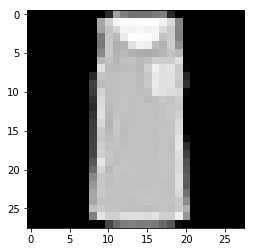

In [13]:
import matplotlib.pyplot as plt
plt.imshow(images[0,0], cmap='gray')
plt.show()

In [16]:
# Use SVM on MNIST Image
# Load the MNIST image
mnist = cv2.imread('../datasets/digits.png', 0)

# Split the images by equal 50 x 100
images = [np.hsplit(row, 100) for row in np.vsplit(mnist, 50)]
images = np.array(images, dtype=np.float32)

# Split the images into 50/50 train/test set
train_features = images[:, :50].reshape(-1, (20 * 20))
test_features = images[:, 50:100].reshape(-1, (20 * 20))

# Create labels
k = np.arange(10)
train_labels = np.repeat(k, 250).reshape(-1, 1)
test_labels = train_labels.copy()

# Create SVM model
model = cv2.ml.SVM_create()
model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)

# Train the model
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

# Use trained SVM
result = model.predict(test_features)

# print(result)
# print(test_labels)

# Measure model accuracy
matches = np.equal(result[1], test_labels)

# Convert boolean to int
matches = matches.astype(np.int)

# Count the correct predictions
correct = np.count_nonzero(matches)

# Calculate the accuracy
accuracy = (correct * 100.0) / result[1].size

# Print the accuracy
print("Acccuracy: {}".format(accuracy))

Acccuracy: 90.44


In [17]:
# Activity: Use Fashion MNIST image, using SVM
# Load the MNIST Fashion image
fashion = cv2.imread('../datasets/fashion.png', 0)

# Split the images by equal 30 x 30
images = [np.hsplit(row, 30) for row in np.vsplit(fashion, 30)]
images = np.array(images, dtype=np.float32)

# Split the images into 50/50 train/test set
train_features = images[:, :15].reshape(-1, (28 * 28))
test_features = images[:, 15:30].reshape(-1, (28 * 28))

# Create labels
k = np.arange(10)
train_labels = np.repeat(k, 45).reshape(-1, 1)
test_labels = train_labels.copy()

# Create SVM model
model = cv2.ml.SVM_create()
model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)

# Train the model
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

# Use trained SVM
result = model.predict(test_features)

# Measure model accuracy
matches = np.equal(result[1], test_labels)

# Convert boolean to int
matches = matches.astype(np.int)

# Count the correct predictions
correct = np.count_nonzero(matches)

# Calculate the accuracy
accuracy = (correct * 100.0) / result[1].size

# Print the accuracy
print("Acccuracy: {}".format(accuracy))

Acccuracy: 74.66666666666667


# Mean Normalization
Use normalization if:
- mean of data frame is not approaching zero
- standard deviation is not approaching one

In [21]:
# Mean normalization: MNIST - kNN
# Load the MNIST image
mnist = cv2.imread('../datasets/digits.png', 0)

# Split the images by equal 50 x 100
images = [np.hsplit(row, 100) for row in np.vsplit(mnist, 50)]
images = np.array(images, dtype=np.float32)

# Split the images into 50/50 train/test set
train_features = images[:, :50].reshape(-1, (20 * 20))
test_features = images[:, 50:100].reshape(-1, (20 * 20))

# Mean normalization
train_features -= np.mean(train_features, axis=0)
test_features -= np.mean(train_features, axis=0)

# Create labels
k = np.arange(10)
train_labels = np.repeat(k, 250).reshape(-1, 1)
test_labels = train_labels.copy()

# Create kNN model
knn = cv2.ml.KNearest_create()
knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

# Classify test results, use k = 3
ret, result, neighbors, dist = knn.findNearest(test_features, 3)

# Measure model accuracy
matches = np.equal(result, test_labels)

# Convert boolean to int
matches = matches.astype(np.int)

# Count the correct predictions
correct = np.count_nonzero(matches)

# Calculate the accuracy
accuracy = (correct * 100.0) / result.size

# Print the accuracy
print("Acccuracy: {}".format(accuracy))

Acccuracy: 79.24


In [22]:
# Mean normalization: MNIST Fashion - kNN
# Load the MNIST Fashion image
fashion = cv2.imread('../datasets/fashion.png', 0)

# Split the images by equal 30 x 30
images = [np.hsplit(row, 30) for row in np.vsplit(fashion, 30)]
images = np.array(images, dtype=np.float32)

# Split the images into 50/50 train/test set
train_features = images[:, :15].reshape(-1, (28 * 28))
test_features = images[:, 15:30].reshape(-1, (28 * 28))

# Mean normalization
train_features -= np.mean(train_features, axis=0)
test_features -= np.mean(train_features, axis=0)

# Create labels
k = np.arange(10)
train_labels = np.repeat(k, 45).reshape(-1, 1)
test_labels = train_labels.copy()

# Create kNN model
knn = cv2.ml.KNearest_create()
knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

# Classify test results, use k = 2
ret, result, neighbors, dist = knn.findNearest(test_features, 3)

# Measure model accuracy
matches = np.equal(result, test_labels)

# Convert boolean to int
matches = matches.astype(np.int)

# Count the correct predictions
correct = np.count_nonzero(matches)

# Calculate the accuracy
accuracy = (correct * 100.0) / result.size

# Print the accuracy
print("Acccuracy: {}".format(accuracy))

Acccuracy: 52.0


In [23]:
# Mean normalization: MNIST - SVM
# Load the MNIST image
mnist = cv2.imread('../datasets/digits.png', 0)

# Split the images by equal 50 x 100
images = [np.hsplit(row, 100) for row in np.vsplit(mnist, 50)]
images = np.array(images, dtype=np.float32)

# Split the images into 50/50 train/test set
train_features = images[:, :50].reshape(-1, (20 * 20))
test_features = images[:, 50:100].reshape(-1, (20 * 20))

# Mean normalization
train_features -= np.mean(train_features, axis=0)
test_features -= np.mean(train_features, axis=0)

# Create labels
k = np.arange(10)
train_labels = np.repeat(k, 250).reshape(-1, 1)
test_labels = train_labels.copy()

# Create SVM model
model = cv2.ml.SVM_create()
model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)

# Train the model
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

# Use trained SVM
result = model.predict(test_features)

# print(result)
# print(test_labels)

# Measure model accuracy
matches = np.equal(result[1], test_labels)

# Convert boolean to int
matches = matches.astype(np.int)

# Count the correct predictions
correct = np.count_nonzero(matches)

# Calculate the accuracy
accuracy = (correct * 100.0) / result[1].size

# Print the accuracy
print("Acccuracy: {}".format(accuracy))

Acccuracy: 66.8


In [25]:
# Mean normalization: MNIST Fashion - SVM
# Load the MNIST Fashion image
fashion = cv2.imread('../datasets/fashion.png', 0)

# Split the images by equal 30 x 30
images = [np.hsplit(row, 30) for row in np.vsplit(fashion, 30)]
images = np.array(images, dtype=np.float32)

# Split the images into 50/50 train/test set
train_features = images[:, :15].reshape(-1, (28 * 28))
test_features = images[:, 15:30].reshape(-1, (28 * 28))

# Mean normalization
train_features -= np.mean(train_features, axis=0)
test_features -= np.mean(train_features, axis=0)

# Create labels
k = np.arange(10)
train_labels = np.repeat(k, 45).reshape(-1, 1)
test_labels = train_labels.copy()

# Create SVM model
model = cv2.ml.SVM_create()
model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)

# Train the model
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

# Use trained SVM
result = model.predict(test_features)

# Measure model accuracy
matches = np.equal(result[1], test_labels)

# Convert boolean to int
matches = matches.astype(np.int)

# Count the correct predictions
correct = np.count_nonzero(matches)

# Calculate the accuracy
accuracy = (correct * 100.0) / result[1].size

# Print the accuracy
print("Acccuracy: {}".format(accuracy))

Acccuracy: 56.44444444444444


# PCA
1. From a given line, get the perpendicular distance from each points
2. Get the maximum distance (?)

In [55]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=100)

In [56]:
# PCA: MNIST - kNN
# Load the MNIST image
mnist = cv2.imread('../datasets/digits.png', 0)

# Split the images by equal 50 x 100
images = [np.hsplit(row, 100) for row in np.vsplit(mnist, 50)]
images = np.array(images, dtype=np.float32)

# Split the images into 50/50 train/test set
train_features = images[:, :50].reshape(-1, (20 * 20))
test_features = images[:, 50:100].reshape(-1, (20 * 20))

# Apply PCA
pca.fit(train_features)
train_features = pca.transform(train_features)
test_features = pca.transform(test_features)

# Create labels
k = np.arange(10)
train_labels = np.repeat(k, 250).reshape(-1, 1)
test_labels = train_labels.copy()

# Create kNN model
knn = cv2.ml.KNearest_create()
knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

# Classify test results, use k = 3
ret, result, neighbors, dist = knn.findNearest(test_features, 3)

# Measure model accuracy
matches = np.equal(result, test_labels)

# Convert boolean to int
matches = matches.astype(np.int)

# Count the correct predictions
correct = np.count_nonzero(matches)

# Calculate the accuracy
accuracy = (correct * 100.0) / result.size

# Print the accuracy
print("Acccuracy: {}".format(accuracy))

Acccuracy: 92.44


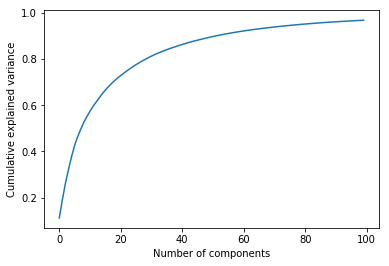

In [51]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [57]:
# PCA: MNIST Fashion - kNN
# Load the MNIST Fashion image
fashion = cv2.imread('../datasets/fashion.png', 0)

# Split the images by equal 30 x 30
images = [np.hsplit(row, 30) for row in np.vsplit(fashion, 30)]
images = np.array(images, dtype=np.float32)

# Split the images into 50/50 train/test set
train_features = images[:, :15].reshape(-1, (28 * 28))
test_features = images[:, 15:30].reshape(-1, (28 * 28))

# Apply PCA
pca.fit(train_features)
train_features = pca.transform(train_features)
test_features = pca.transform(test_features)

# Create labels
k = np.arange(10)
train_labels = np.repeat(k, 45).reshape(-1, 1)
test_labels = train_labels.copy()

# Create kNN model
knn = cv2.ml.KNearest_create()
knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

# Classify test results, use k = 2
ret, result, neighbors, dist = knn.findNearest(test_features, 3)

# Measure model accuracy
matches = np.equal(result, test_labels)

# Convert boolean to int
matches = matches.astype(np.int)

# Count the correct predictions
correct = np.count_nonzero(matches)

# Calculate the accuracy
accuracy = (correct * 100.0) / result.size

# Print the accuracy
print("Acccuracy: {}".format(accuracy))

Acccuracy: 71.11111111111111


In [58]:
# PCA: MNIST - SVM
# Load the MNIST image
mnist = cv2.imread('../datasets/digits.png', 0)

# Split the images by equal 50 x 100
images = [np.hsplit(row, 100) for row in np.vsplit(mnist, 50)]
images = np.array(images, dtype=np.float32)

# Split the images into 50/50 train/test set
train_features = images[:, :50].reshape(-1, (20 * 20))
test_features = images[:, 50:100].reshape(-1, (20 * 20))

# Apply PCA
pca.fit(train_features)
train_features = pca.transform(train_features)
test_features = pca.transform(test_features)

# Create labels
k = np.arange(10)
train_labels = np.repeat(k, 250).reshape(-1, 1)
test_labels = train_labels.copy()

# Create SVM model
model = cv2.ml.SVM_create()
model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)

# Train the model
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

# Use trained SVM
result = model.predict(test_features)

# print(result)
# print(test_labels)

# Measure model accuracy
matches = np.equal(result[1], test_labels)

# Convert boolean to int
matches = matches.astype(np.int)

# Count the correct predictions
correct = np.count_nonzero(matches)

# Calculate the accuracy
accuracy = (correct * 100.0) / result[1].size

# Print the accuracy
print("Acccuracy: {}".format(accuracy))

Acccuracy: 89.56


In [74]:
# PCA: MNIST Fashion - SVM
# Load the MNIST Fashion image
fashion = cv2.imread('../datasets/fashion.png', 0)

# Split the images by equal 30 x 30
images = [np.hsplit(row, 30) for row in np.vsplit(fashion, 30)]
images = np.array(images, dtype=np.float32)

# Split the images into 50/50 train/test set
train_features = images[:, :15].reshape(-1, (28 * 28))
test_features = images[:, 15:30].reshape(-1, (28 * 28))

# Apply PCA
pca.fit(train_features)
train_features = pca.transform(train_features)
test_features = pca.transform(test_features)

# Create labels
k = np.arange(10)
train_labels = np.repeat(k, 45).reshape(-1, 1)
test_labels = train_labels.copy()

# Create SVM model
model = cv2.ml.SVM_create()
model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)

# Train the model
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

# Use trained SVM
result = model.predict(test_features)

# Measure model accuracy
matches = np.equal(result[1], test_labels)

# Convert boolean to int
matches = matches.astype(np.int)

# Count the correct predictions
correct = np.count_nonzero(matches)

# Calculate the accuracy
accuracy = (correct * 100.0) / result[1].size

# Print the accuracy
print("Acccuracy: {}".format(accuracy))

Acccuracy: 72.44444444444444
